<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Features-Explained" data-toc-modified-id="Features-Explained-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Features Explained</a></span></li><li><span><a href="#Splitting-into-train-and-test-dataset" data-toc-modified-id="Splitting-into-train-and-test-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Splitting into train and test dataset</a></span></li><li><span><a href="#Logarithmic-transformation" data-toc-modified-id="Logarithmic-transformation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Logarithmic transformation</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dimensionality Reduction</a></span><ul class="toc-item"><li><span><a href="#Principal-component-analysis---PCA" data-toc-modified-id="Principal-component-analysis---PCA-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Principal component analysis - PCA</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#Clustering-Methods" data-toc-modified-id="Clustering-Methods-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Clustering Methods</a></span><ul class="toc-item"><li><span><a href="#Metric" data-toc-modified-id="Metric-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Metric</a></span></li><li><span><a href="#K-means-Clustering" data-toc-modified-id="K-means-Clustering-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>K-means Clustering</a></span></li><li><span><a href="#Similarity-metric-of-PSDs" data-toc-modified-id="Similarity-metric-of-PSDs-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Similarity metric of PSDs</a></span></li><li><span><a href="#Mean-shift-Clustering" data-toc-modified-id="Mean-shift-Clustering-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Mean-shift Clustering</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li></ul></div>

# WORK IN PROGRESS - NOT EXECUTABLE ATM

# Basic Clustering EDA





## Setup


In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# init audition function
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\audition_function\JupyterLoad_audition_function.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load audition_function_main
load audition_function_audio
load audition_function_baseplots
load audition_function_akkuplot


## Loading Data

In [4]:
def save_pickle(filename, save_data):
    """
    picklenize the data.

    filename : str
        pickle filename
    data : free datatype
        some data will be picklenized

    return : None
    """
    #logger.info("save_pickle -> {}".format(filename))
    with open(filename, 'wb') as sf:
        pickle.dump(save_data, sf)

def load_pickle(filename):
    """
    unpicklenize the data.

    filename : str
        pickle filename

    return : data
    """
    #logger.info("load_pickle <- {}".format(filename))
    with open(filename, 'rb') as lf:
        load_data = pickle.load(lf)
    return load_data

In [5]:
path = '.\..\..\dataset\PSD_to_Pandas\pump_6dB_00020406_full_spectrum_128.pkl'
df = load_pickle(path)

In [6]:
df.head()

,path,abnormal,ID,file,machine,SNR,218.75,250.0,281.25,312.5,...,7718.75,7750.0,7781.25,7812.5,7843.75,7875.0,7906.25,7937.5,7968.75,8000.0
0,\dataset\6dB\pump\id_00\normal\00000000.wav,0,00,00000000,pump,6dB,0.000004,0.000003,0.000002,0.000002,...,5.316734e-08,4.912297e-08,4.514861e-08,4.101671e-08,3.675314e-08,3.258963e-08,2.884488e-08,2.584379e-08,2.388666e-08,1.160220e-08
1,\dataset\6dB\pump\id_00\normal\00000001.wav,0,00,00000001,pump,6dB,0.000003,0.000003,0.000002,0.000002,...,4.854261e-08,4.483064e-08,4.085616e-08,3.666347e-08,3.244671e-08,2.848889e-08,2.507934e-08,2.246388e-08,2.082307e-08,1.013221e-08
2,\dataset\6dB\pump\id_00\normal\00000002.wav,0,00,00000002,pump,6dB,0.000002,0.000002,0.000002,0.000001,...,5.378221e-08,4.898495e-08,4.364978e-08,3.830553e-08,3.348502e-08,2.945000e-08,2.619801e-08,2.369038e-08,2.203722e-08,1.072503e-08
3,\dataset\6dB\pump\id_00\normal\00000003.wav,0,00,00000003,pump,6dB,0.000004,0.000003,0.000003,0.000002,...,6.512921e-08,5.893400e-08,5.186951e-08,4.495402e-08,3.882366e-08,3.368393e-08,2.954767e-08,2.645704e-08,2.452590e-08,1.193363e-08
4,\dataset\6dB\pump\id_00\normal\00000004.wav,0,00,00000004,pump,6dB,0.000003,0.000002,0.000002,0.000001,...,5.914793e-08,5.402140e-08,4.937084e-08,4.518709e-08,4.144083e-08,3.815570e-08,3.540896e-08,3.331252e-08,3.198863e-08,1.576743e-08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Columns: 256 entries, path to 8000.0
dtypes: float64(250), object(6)
memory usage: 8.2+ MB


In [8]:
df.describe()

,218.75,250.00,281.25,312.50,343.75,375.00,406.25,437.50,468.75,500.00,...,7718.75,7750.00,7781.25,7812.50,7843.75,7875.00,7906.25,7937.50,7968.75,8000.00
count,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,...,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03,4.205000e+03
mean,5.931106e-06,5.154200e-06,4.385441e-06,3.892323e-06,3.790864e-06,3.995439e-06,4.272094e-06,4.368923e-06,4.147906e-06,3.641243e-06,...,3.386306e-08,3.128393e-08,2.871046e-08,2.619570e-08,2.383421e-08,2.170988e-08,1.989652e-08,1.848904e-08,1.759370e-08,8.643369e-09
std,5.677513e-06,5.119615e-06,4.862077e-06,5.350992e-06,6.576863e-06,8.223033e-06,9.740067e-06,1.049606e-05,1.009603e-05,8.646621e-06,...,4.132355e-08,3.900647e-08,3.608539e-08,3.276075e-08,2.936627e-08,2.624135e-08,2.364479e-08,2.174310e-08,2.061146e-08,1.012069e-08
min,2.108944e-07,1.871966e-07,1.628543e-07,1.437357e-07,1.357622e-07,1.461928e-07,1.772929e-07,2.204773e-07,2.579697e-07,2.735737e-07,...,2.180782e-10,2.240356e-10,1.861929e-10,1.514423e-10,1.673301e-10,1.844800e-10,1.556216e-10,1.322025e-10,1.599437e-10,7.885393e-11
25%,2.805031e-06,2.334984e-06,1.939897e-06,1.733770e-06,1.579714e-06,1.406948e-06,1.283788e-06,1.181746e-06,1.109091e-06,1.036510e-06,...,1.065747e-08,9.629805e-09,8.725706e-09,8.034453e-09,7.364948e-09,6.688376e-09,6.117283e-09,5.718248e-09,5.428887e-09,2.663811e-09
50%,4.226884e-06,3.575048e-06,2.940783e-06,2.399772e-06,2.049277e-06,1.791573e-06,1.612489e-06,1.519296e-06,1.532274e-06,1.537763e-06,...,2.390659e-08,2.168218e-08,1.952067e-08,1.745233e-08,1.580279e-08,1.450603e-08,1.347441e-08,1.279868e-08,1.236971e-08,6.130807e-09
75%,5.675316e-06,5.315224e-06,4.742124e-06,3.769689e-06,2.978713e-06,2.627674e-06,2.617063e-06,2.701507e-06,2.673948e-06,2.536627e-06,...,4.552585e-08,4.153099e-08,3.771390e-08,3.387325e-08,3.045593e-08,2.832565e-08,2.595443e-08,2.433692e-08,2.319920e-08,1.137909e-08
max,3.100268e-05,3.484978e-05,4.412388e-05,5.585425e-05,7.185727e-05,9.172344e-05,1.107962e-04,1.214984e-04,1.180223e-04,1.007610e-04,...,5.116127e-07,4.842141e-07,4.432166e-07,3.920642e-07,3.403797e-07,2.971352e-07,2.668789e-07,2.490970e-07,2.405235e-07,1.190310e-07


In [9]:
# let's get the frequencies of these bins
feat = df.columns[df.dtypes==np.float64]

descriptive = [label for label in df.columns[df.dtypes==np.object] if not 'abnormal' in label]

target = ['abnormal']

IDs = df.ID.unique()

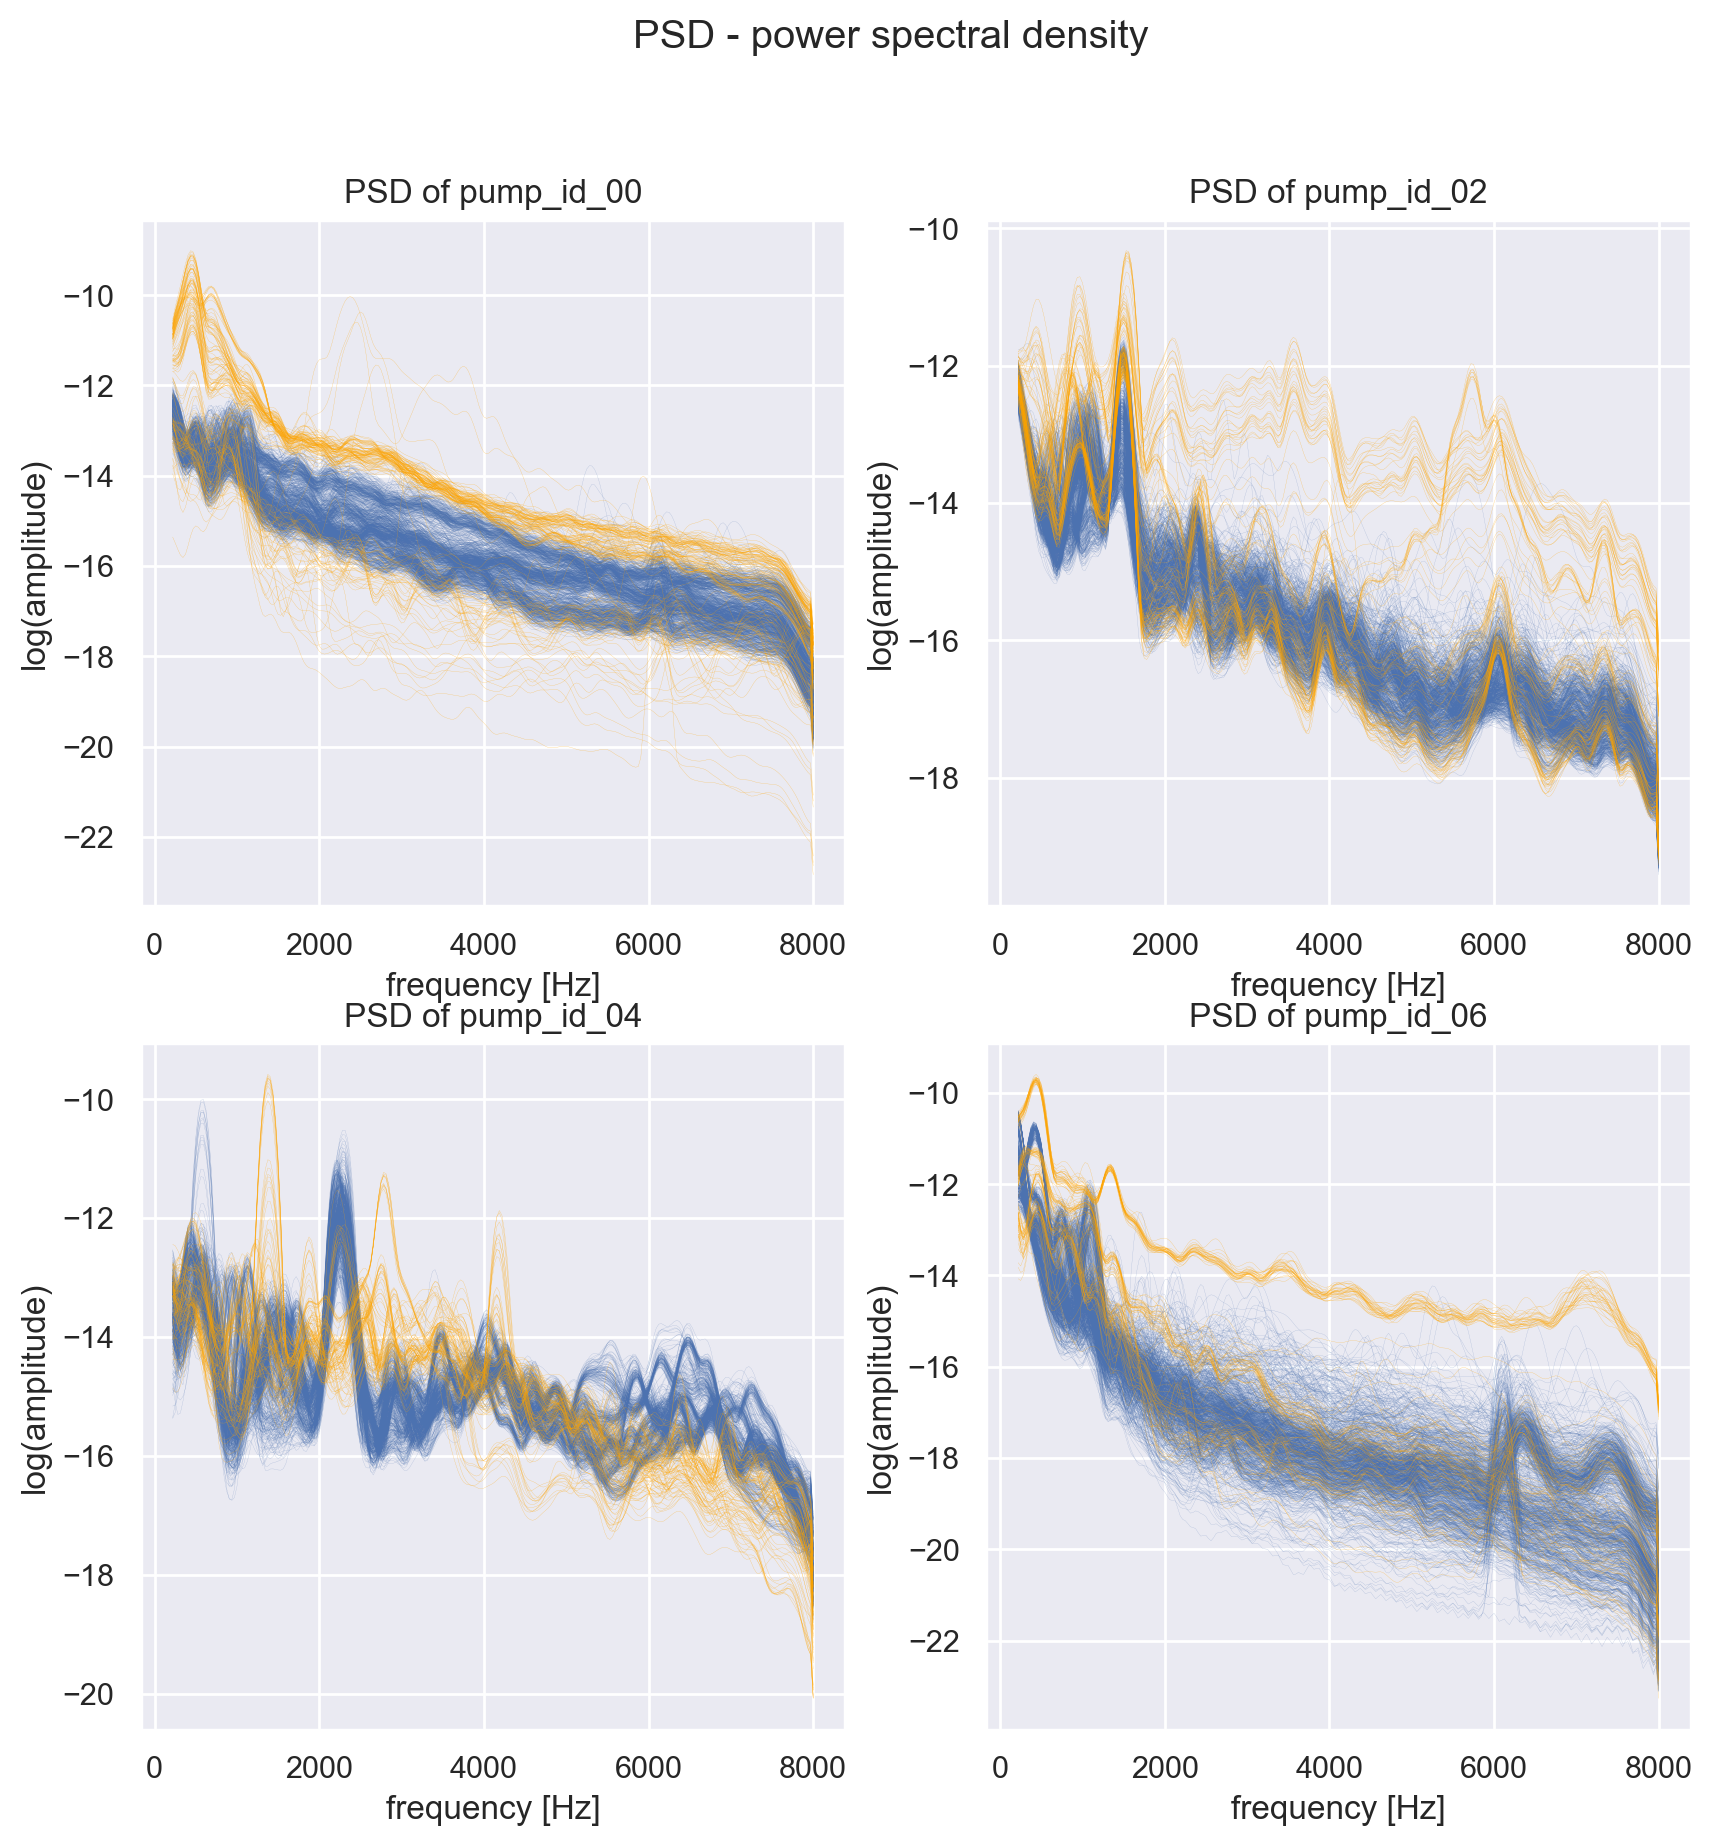

In [10]:
plt.figure(figsize=(10, 10), dpi=200)
plt.suptitle('PSD - power spectral density')
for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
    ax1 = plt.plot(feat, df[(df.ID==ID) & (df.abnormal==0)][feat].apply(lambda x : np.log(x)).T
                                , linewidth=.1, alpha=.4, color='b'
                                , label='normal op.');
    ax2 = plt.plot(feat, df[(df.ID==ID) & (df.abnormal==1)][feat].apply(lambda x : np.log(x)).T
                                , linewidth=.1, alpha=.6, color='orange', label='abnormal op.');
    plt.xlabel('frequency [Hz]')
    plt.ylabel('log(amplitude)')
    plt.title('PSD of pump_id_{00}'.format(ID))

#plt.legend()
plt.show()

## Features Explained

## Splitting into train and test dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# we will combine the testset from all abnormal operation data
# and add up the same amount of normal operation data
# the remaining will be out training dataset

def split_index(indeces, labels):

    idx_abnormal = indeces[labels==1]
    num_abnormal = len(idx_abnormal)
    
    idx_normal = indeces[labels==0]
    idx_train, idx_test_normal = train_test_split(idx_normal, test_size=num_abnormal)

    # the testset contains all abnormal operation data
    idx_test = idx_test_normal.union(idx_abnormal)
    #idx_test.shuffle()

    return idx_train, idx_test

In [12]:
X_train = {}
X_test = {}

idx_train = {}
idx_test = {}

for ID in IDs:
    idx_train[ID], idx_test[ID] = split_index(df[df.ID==ID].index, df[df.ID==ID].abnormal)    

# Preprocessing

In [13]:
# as we want to apply functions like scalers and transformers 
# to out dataframe which may only apply to part of the dataframe, 
# we create a utility that does this for us

def apply_df(func):
    pass

## Logarithmic transformation
The power in the PSD ranges over multiple magnitudes. It is common practice in handling audio data to logtransform. In fact the dB-scale is a log-transformed scale


In [15]:
df_log = log_transform(df, feat)

## Scaling



In [16]:
def scale_transform(df, feat, idx_train, model):

    row_idx = df[feat].index
    col_idx = df[feat].columns

    # fit scaler/transformer only on train instances
    model.fit(df.loc[idx_train, feat])
    
    # transform all data, including "abnormal" operation
    # model would return a numpy array
    # we want to keep the dataframe and right indexing
    df.loc[row_idx, col_idx] = pd.DataFrame(model.transform(
        df[feat]), columns=df[feat].columns).set_index(df.index)
    
    return df, model

In [17]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

# fit the scaler on the "normal" operation data
scaler = StandardScaler()

for ID in IDs:
    df_scaled = scale_transform(df_log[df_log.ID==ID], feat, idx_train[ID],scaler)

In [18]:
def deconstruct(df):
    # implement this function and add it to scaling
    #returns individual dataframes with correct indexing
    pass
    
def reconstruct(dict_of_df, descriptive_df):
    list_of_df = [dict_of_df[d] for d in dict_of_df]
    df = pd.concat(list_of_df)

    return descriptive_df.join(df, how='right')

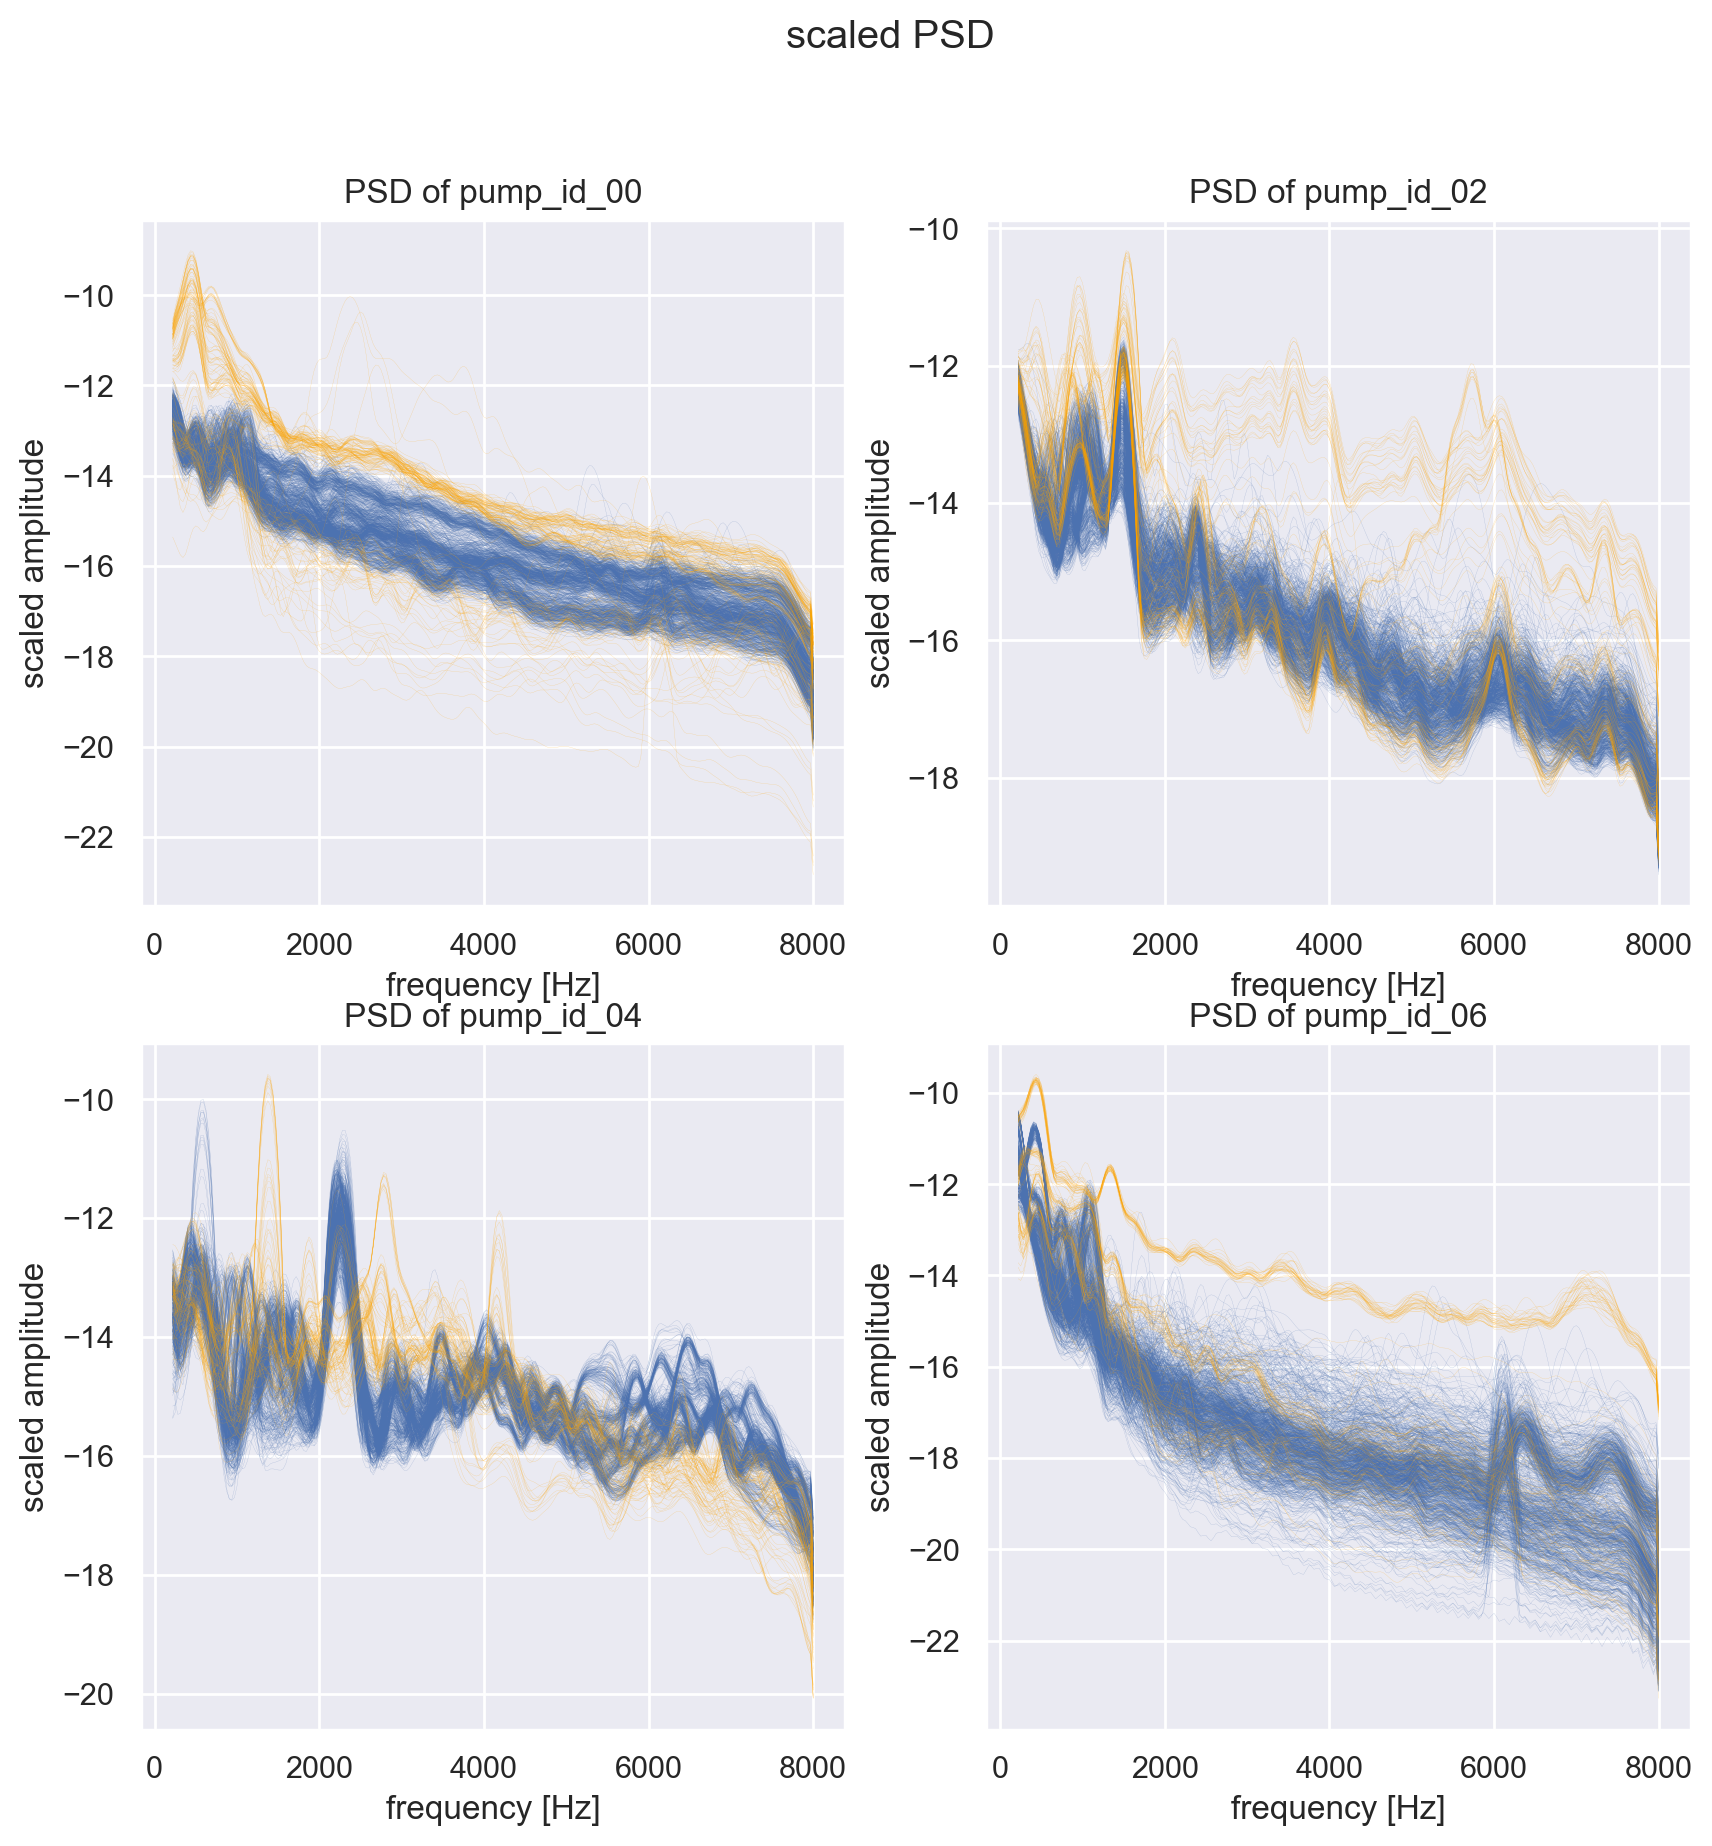

In [19]:
plt.figure(figsize=(10, 10), dpi=200)
plt.suptitle('scaled PSD')
for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
    ax1 = plt.plot(feat, df[(df.ID==ID) & (df.abnormal==0)][feat].T, linewidth=.1, alpha=.4, color='b'
                   , label='normal op.');
    ax2 = plt.plot(feat, df[(df.ID==ID) & (df.abnormal==1)][feat].T, linewidth=.1, alpha=.4, color='orange'
                  , label='abnormal op.');
    plt.xlabel('frequency [Hz]')
    plt.ylabel('scaled amplitude')
    plt.title('PSD of pump_id_{00}'.format(ID))

#plt.legend()
plt.show()

## Dimensionality Reduction


### Principal component analysis - PCA

In [20]:
from sklearn.decomposition import PCA

n_prin_comp = 50
# instantiate pca
pca = PCA(n_components=n_prin_comp, svd_solver='full')

X_pca = {}
PCAs = {}
for ID in IDs:
    X_pca[ID], PCAs[ID] = scale_transform(X[ID], feat, pca)

NameError: name 'X' is not defined

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

for i, ID in enumerate(IDs):
    plt.plot(range(1,n_prin_comp+1), np.cumsum(PCAs[ID].explained_variance_ratio_)
                    , label='PSD of pump_id_{00}'.format(ID))
    plt.xlabel('principal component')
    plt.ylabel('cumulated explained variance ratio')
    plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.suptitle('2D separation by first 2 principal components')

for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
    ax1 = plt.scatter(X_pca[ID][y[ID]==0][:,0], X_pca[ID][y[ID]==0][:,1], color='b'
                        , cmap='seismic', marker='+'
                        , alpha=.3, label=('abnormal', 'normal'))
    ax2 = plt.scatter(X_pca[ID][y[ID]==1][:,0], X_pca[ID][y[ID]==1][:,1], color='r'
                        , cmap='seismic', marker='+'
                        , alpha=.4, label=('abnormal', 'normal'))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PSD of pump_id_{00}'.format(ID))
    plt.legend((ax1, ax2), ('normal', 'abnormal'))
plt.show()




### t-SNE

In [ ]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components=2, random_state=42)
X_tsne = {}

for ID in IDs:
    # transform all data
    X_tsne[ID] = t_sne.fit_transform(X[ID][feat])

In [ ]:
%matplotlib inline
%run ../../utility/cluster_visual_selector.py

plt.figure(figsize=(10, 10), dpi=200)
plt.suptitle('2D separation by t-SNE')

for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)

    
    ax1 = plt.scatter(X_tsne[ID][y[ID]==0][:,0], X_tsne[ID][y[ID]==0][:,1], color='b'
                        , cmap='seismic', marker='+'
                        , alpha=.3, label=('abnormal', 'normal'))
    ax2 = plt.scatter(X_tsne[ID][y[ID]==1][:,0], X_tsne[ID][y[ID]==1][:,1], color='r'
                        , cmap='seismic', marker='+'
                        , alpha=.4, label=('abnormal', 'normal'))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PSD of pump_id_{00}'.format(ID))
    plt.legend((ax1, ax2), ('normal', 'abnormal'))
plt.show()

## Clustering Methods

The following table shows a short summary of the methods https://scikit-learn.org/stable/modules/clustering.html


| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |


### Metric
Because we can't compare our clusters to the labels we have, we will define a universal measure. Based to this article https://ethen8181.github.io/machine-learning/clustering_old/clustering/clustering.html we will consider the Calinski-Harabasz score, also known as variance ratio criterion the best fit for our problem as it can be evaluated automatically. The best model is to be considered the model with the first local maximum. This method is more distinct than the known "elbow method".

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
from scipy.signal import argrelextrema

def find_max(ch_scores):
    ''' 
    1. returns the index of the first local maximum
    2. if first or element is global maximum, returns index 0
    
    '''
    
    maxima = argrelextrema(np.array(ch_scores), np.greater)
    
    if ch_scores[0] == np.max(ch_scores):
        maxima = [[0]]

    return maxima[0][0]

In [ ]:
def evaluate_clustering(model, args, X, y, metric='ch_score'):
    # initiate scoring lists
    _score = []
    outlier = []
    homogeneity = []
    completeness = []

    # set up cluster storing
    clusters = []

    for arg_idx, arg in enumerate(args):
        # reinitialize model with arguments
        model.__init__(**arg)

        # store predictions
        _clusters = model.fit_predict(X)
        clusters.append(_clusters)

        if len(np.unique(_clusters)) >= 2: 
            # calculate the score
            if metric == 'ch_score':
                _score.append(calinski_harabasz_score(X, _clusters))

            elif metric == 'db_score':
                _score.append(davies_bouldin_score(X, _clusters))
        else:
            # if we have only 1 cluster, the scoring fails
            # we need to address this case
            _score.append(np.NaN)

        outlier.append(np.sum(_clusters==-1))

        # calculate the homogeneity and completeness of those clusters
        homogeneity.append(homogeneity_score(y, _clusters))
        completeness.append(completeness_score(y, _clusters))

    # get the best set of model arguments
    if metric == 'ch_score':
        best_index = find_max(_score)

    elif metric == 'db_score':
        best_index = np.argmin(_score)

    best_args = args[best_index]
    best_clusters = clusters[best_index]

    return best_clusters, best_args, _score, homogeneity, completeness

In [ ]:
def evaluate_args(ch_score, args, score_label='calinski harabasz score', keyword=None):
    
    IDs = ch_score.keys()
    
    plt.figure(figsize=(10,10), dpi=200)
    plt.suptitle('Elbow plot of k-means score')
    
    for i, ID in enumerate(IDs):
        max_clusters = len(ch_score[ID])
        
        # create the plot
        plt.subplot(2, 2, i+1)
        plt.title('PSD of pump_id_{00}'.format(ID))
        
        plt.scatter(x=[i for i in range(2,max_clusters+2)],y=ch_score[ID],s=50, edgecolor='k')
        
        plt.grid(True)
        plt.xlabel("number of clusters")
        plt.ylabel(score_label)
        plt.xticks([i for i in range(2,max_clusters+1)])

    plt.show()

### K-means Clustering

Question: Is KMeans able to identify two types of operation and how distinct is the separation?

In [ ]:
from sklearn.cluster import KMeans

args = [{'n_clusters': num_clusters,
         'init': 'k-means++',
         'n_jobs': -1}
        for num_clusters in range(2, 15)]
model = KMeans()

# list the machine IDs
IDs = X.keys()

# initiate scoring dictionary
score = {}
homogeneity = {}
completeness = {}

# initiate best_clusters
best_clusters = {}

# store the best args for each ID
best_args = {}

for i, ID in enumerate(IDs):
    best_clusters[ID], best_args[ID], score[ID], homogeneity[ID], completeness[ID] = evaluate_clustering(
        model, args, X_train[ID][feat], X_train[ID].abnormal, metric='db_score')

    X_train[ID] = X_train[ID].join(
        pd.Series(data=best_clusters[ID], name='k_mean_clust', index=idx_train[ID]))

In [ ]:
evaluate_args(score, args, score_label='davies bouldin score')

### Similarity metric of PSDs

In [ ]:
mean_psd = {}

for ID in IDs:
    gb = df_log.iloc[X_train[ID].index,:].groupby(by=X_train[ID].k_mean_clust)
    mean_psd[ID] = gb.mean()[feat]

In [ ]:
from matplotlib.cm import get_cmap

cmap = get_cmap('Set1')

plt.figure(figsize=(10, 10), dpi=200)
plt.suptitle('scaled PSD')

for i, ID in enumerate(IDs):
    plt.subplot(2, 2, i+1)
    clusters = X_train[ID].k_mean_clust.unique()
    for cluster in clusters:
        plt.plot(feat, df_log.iloc[X_train[ID].index,:][X_train[ID].k_mean_clust==cluster][feat].T
                       , linewidth=.1, alpha=.4, color=cmap(cluster/len(clusters)))
        plt.plot(feat, mean_psd[ID].iloc[cluster, :], 'k')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('scaled amplitude')
    plt.title('PSD of pump_id_{00}'.format(ID))
# plt.legend()
plt.show()

Let's hear into some of those clusters

In [ ]:
# this syntax can be used to make mixes 
df_select =                  X_train['00'][X_train['00'].k_mean_clust==0].sample()
df_select = df_select.append(X_train['00'][X_train['00'].k_mean_clust==1].sample())
df_select = df_select.append(X_test[X_test.ID == '00'][X_test.abnormal==1].sample())
len(df_select.index)

make_audition_list(df_select,'../../',
                   listen=True, time_plot_ch = -1,
                   psd_from_data=True, 
                   Combine_psdfft=False, 
                   listen_every = 1, 
                   no_section=False,
                   mel_create=True,
                   psd_from_data_dB=False)

Now we will calculate the similiarities between the mean PSDs we found and the instances in out test dataset.

In [ ]:
from scipy.stats import pearsonr

thresholds = pd.DataFrame(
    columns=['ID', 'cluster', 'min', 'std', 'mean', 'median', 'max', 'threshold', 'drop'])

for ID in IDs:

    clusters = X_train[ID].k_mean_clust.unique()
    for cluster in clusters:
        psd_mean = mean_psd[ID].iloc[cluster, :]
        
        corr_ = []
        psds = df_log.iloc[X_train[ID].index, :][X_train[ID].k_mean_clust==cluster]
        for idx_psd in range(len(psds)):
            corr_.append(pearsonr(psd_mean, psds[feat].iloc[idx_psd, :])[0])

        threshold = np.median(corr_)-3*np.std(corr_)
        drop = np.sum(corr_ < threshold)/len(corr_)

        data = [ID, cluster, np.min(corr_), np.std(corr_), np.mean(corr_), np.median(corr_), np.max(corr_), threshold, drop]
        thr_ = pd.DataFrame(data=[data], columns=thresholds.columns)
        thresholds = thresholds.append(thr_, ignore_index=True)

In [ ]:
thresholds

In [ ]:
format1_ = 'corr_clust_{00}'  # for correlations
format2_ = 'is_clust_{00}'  # for decision if as cluster or not

columns1 = [format1_.format(cluster)
            for cluster in range(thresholds.cluster.max()+1)]
columns2 = [format2_.format(cluster)
            for cluster in range(thresholds.cluster.max()+1)]
columns = columns1 + columns2

classification = pd.DataFrame(columns=columns)
classification[columns1].astype(np.float64)
classification[columns2].astype(np.bool);

In [ ]:
def any_cluster(row):
    return np.any(row)

In [ ]:
for index, row in X_test.iterrows():

    ID = row.ID
    clusters = thresholds[thresholds.ID == ID].cluster.unique()

    for cluster in clusters:

        psd_mean = mean_psd[ID].iloc[cluster, :]
        classification.at[index, format1_.format(
            cluster)] = pearsonr(psd_mean, row[feat])[0]

        threshold = thresholds[(thresholds.ID == ID) & (
            thresholds.cluster == cluster)].threshold
        
        _is_clust = (pearsonr(psd_mean, row[feat])[0] < threshold).values[0]
        classification.at[index, format2_.format(cluster)] = _is_clust

In [ ]:
is_no_clust = []
for index, row in classification.iterrows():
    is_no_clust.append(~np.any(row[columns2].dropna()))

classification = classification.join(
    [pd.Series(data=is_no_clust, index=classification.index, name='pred_abnormal').astype(np.int8)
    , X_test.abnormal.astype(np.int8)])

classification['pred_abnormal'].unique()

In [ ]:
classification['pred_abnormal'].astype(np.int8).hist()

In [ ]:
from sklearn.metrics import confusion_matrix

for ID in IDs:
    print(30*'-')
    print('confusion matrix pump_{00}'.format(ID))
    print(confusion_matrix(classification[X_test.ID == ID]['abnormal']
                     , classification[X_test.ID == ID]['pred_abnormal']))
    print(30*'-')

# WORK IN PROGRESS SECTION

### Mean-shift Clustering

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms_bandwidth = estimate_bandwidth(X_scaled[ID])
bandwiths = np.linspace(.5, 1.5, 11)*ms_bandwidth

args = [{'bandwidth': bw,
         'n_jobs': -1}
        for bw in bandwiths]

model = MeanShift()

best_clusters, best_args, score, homogeneity, completeness = evaluate_clustering(
    model, args, X_train, y_train, metric='db_score')

In [ ]:
evaluate_args(score, args, score_label='davies bouldin score')

In [ ]:
plt.figure(figsize=(15, 15), dpi=200)
plt.suptitle('Unsupervised separability of operation type by mean-shift')

for i, ID in enumerate(IDs):
# create the plot
    plt.subplot(2, 2, i+1)
    
    plt.title('PSD of pump_id_{00}'.format(ID))
    plt.plot(bandwiths, homogeneity[ID], color='b', label='homogeneity')
    plt.plot(bandwiths, completeness[ID], color='r', label='completeness')
    plt.legend()
    plt.ylabel("Score")
    plt.xlabel("Bandwith")
    
    plt.twinx()
    plt.plot(bandwiths, n_clusters[ID], ':k', label='num clusters')
    plt.ylabel("number of clusters")
    plt.grid(b=None)
    plt.legend()


plt.show()

### DBSCAN

Consider [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) because it is multithreaded.

In [ ]:
# The estimation of epsilon is based on this article: 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

X_scaled = X

from sklearn.neighbors import NearestNeighbors
distance = {}

plt.figure(figsize=(10, 10), dpi=200)
plt.suptitle('Unsupervised separability of operation by k-means')

for i, ID in enumerate(IDs):
    # calculate the distances
    nbrs = NearestNeighbors(n_neighbors=5).fit(X_scaled[ID])
    #distances[ID], indices[ID] = nbrs.kneighbors(X_scaled[ID])
    distances, _ = nbrs.kneighbors(X_scaled[ID])

    # sort the distances
    distance[ID] = np.mean(distances[:, 1:], axis=1)
    distance[ID].sort()

    plt.subplot(2, 2, i+1)

    plt.title('PSD of pump_id_{00}'.format(ID))
    plt.plot(range(len(distance[ID])), distance[ID])
    plt.ylabel("distance")
    plt.xlabel("instances sorted")

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# set up the score
ch_score = {}
min_samples = 10

# from the plot above we estimated the epsilon on the elbow
# we will vary it a little
eps = np.linspace(7.5, 12.5, 21)

plt.figure(figsize=(10, 10), dpi=200)

for i, ID in enumerate(IDs):

    ch_score[ID] = []

    for e in eps:
        # train the k-Means-Clustering algorithm
        db = DBSCAN(eps=e, min_samples=5, n_jobs=-1)
        clusters = db.fit_predict(X_scaled[ID])

        # calculate the calinski_harabasz_score of those clusters
        ch_score[ID].append(calinski_harabasz_score(X_scaled[ID], clusters))

    # create the plot
    plt.subplot(2, 2, i+1)

    plt.title('PSD of pump_id_{00}'.format(ID))
    plt.plot(eps, ch_score[ID], color='b', label='calinski harabasz score')
    plt.xlabel("epsilon")
    plt.ylabel("Score")
    plt.legend()

plt.show()

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Features-Explained" data-toc-modified-id="Features-Explained-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Features Explained</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Distance-Metrics" data-toc-modified-id="Distance-Metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Distance Metrics</a></span><ul class="toc-item"><li><span><a href="#Euclidian-Distance" data-toc-modified-id="Euclidian-Distance-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Euclidian Distance</a></span></li></ul></li><li><span><a href="#Loss-Metrics" data-toc-modified-id="Loss-Metrics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loss Metrics</a></span><ul class="toc-item"><li><span><a href="#Unsupervised" data-toc-modified-id="Unsupervised-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Unsupervised</a></span></li><li><span><a href="#Supervised" data-toc-modified-id="Supervised-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Supervised</a></span></li></ul></li></ul></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Logarithmic-transformation" data-toc-modified-id="Logarithmic-transformation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Logarithmic transformation</a></span></li><li><span><a href="#Dimensionality-Reduction" data-toc-modified-id="Dimensionality-Reduction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dimensionality Reduction</a></span><ul class="toc-item"><li><span><a href="#Principal-component-analysis---PCA" data-toc-modified-id="Principal-component-analysis---PCA-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Principal component analysis - PCA</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#Clustering-Methods" data-toc-modified-id="Clustering-Methods-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Clustering Methods</a></span><ul class="toc-item"><li><span><a href="#Splitting-into-train-and-test-dataset" data-toc-modified-id="Splitting-into-train-and-test-dataset-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Splitting into train and test dataset</a></span></li><li><span><a href="#Metric" data-toc-modified-id="Metric-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Metric</a></span></li><li><span><a href="#K-means-Clustering" data-toc-modified-id="K-means-Clustering-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>K-means Clustering</a></span></li><li><span><a href="#Mean-shift-Clustering" data-toc-modified-id="Mean-shift-Clustering-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Mean-shift Clustering</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li></ul></div>